# Imports

In [ ]:
%conda install -c anaconda scikit-learn
%conda install matplotlib

In [20]:
import sys
import os

import numpy as np
import itertools

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt

import pickle

# Load Data

In [2]:
from google.colab import drive
drive.mount('/data', force_remount=True)

Mounted at /data


In [3]:
%cd ../data/MyDrive/Galvanize/DSI_Capstone_3/

/data/MyDrive/Galvanize/DSI_Capstone_3


In [4]:
from src.data import make_dataset
X, y = make_dataset.fetch_training_data(data_path=os.path.join('data','raw'))
X_test, y_test = make_dataset.fetch_testing_data(data_path=os.path.join('data','raw'))

In [6]:
X.shape

(324000, 28, 28, 4)

In [7]:
X_mod = X.reshape(324000, -1)

In [8]:
X_mod.shape

(324000, 3136)

In [9]:
X_test.shape

(81000, 28, 28, 4)

In [10]:
X_mod_test = X_test.reshape(81000, -1)

In [11]:
X_mod_test.shape

(81000, 3136)

# KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html?highlight=kneighborsclassifier#sklearn.neighbors.KNeighborsClassifier

In [ ]:
# K-NNC
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X, y)

# Predict the labels of test data

knn_pred = knn.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, knn_pred)*100}")

print(classification_report(y_test, knn_pred))

# Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

# Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [22]:
rf = RandomForestClassifier(n_estimators=1000, max_features='auto', max_depth=4, oob_score=True, verbose=1, random_state=0)
rf.fit(X_mod, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed: 171.2min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=0, verbose=1,
                       warm_start=False)

In [23]:
filename = 'finalized_model2.sav'
pickle.dump(rf, open(filename, 'wb'))

In [24]:
# Test Prediction
pred = rf.predict(X_mod_test)
# print(f"log loss = {log_loss(y_test, rf.predict_proba(X_mod_test)[:, 1])}")
print(f"accuracy = {rf.score(X_mod_test, y_test)}")

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   28.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


accuracy = 0.830925925925926


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   28.8s finished


# LGBM
https://lightgbm.readthedocs.io/en/latest/index.html

In [ ]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

# Parameters
params={}
params['learning_rate']=0.03
params['boosting_type']='gbdt' #GradientBoostingDecisionTree
params['objective']='multiclass' #Multi-class target feature
params['metric']='multi_logloss' #metric for multi-class
params['max_depth']=15
params['num_class']=6 #no.of unique values in the target class not inclusive of the end value

clf = lgb.train(params, d_train, 100)

# prediction
lgb_predictions = clf.predict(X_test)
lgb_pred = np.argmax(lgb_predictions, axis=1)

# Accuracy and Classification Report
print(f"Accuracy: {accuracy_score(y_test, lgb_pred)*100}")
print(classification_report(y_test, lgb_pred))

## k-Means

Prepare data

In [ ]:
X.reshape(500, -1).shape

(500, 3136)

In [ ]:
np.where(y==1)[1]

array([2, 1, 5, 5, 5, 0, 0, 5, 1, 2, 5, 1, 1, 4, 5, 2, 5, 3, 3, 1, 5, 1,
       1, 2, 2, 1, 5, 5, 5, 3, 1, 1, 1, 3, 5, 5, 5, 3, 3, 1, 0, 5, 3, 5,
       5, 5, 3, 3, 5, 3, 2, 1, 5, 2, 3, 5, 1, 1, 5, 2, 2, 2, 2, 2, 1, 3,
       5, 3, 5, 2, 2, 5, 0, 3, 5, 5, 3, 3, 5, 1, 5, 0, 5, 1, 5, 2, 1, 1,
       3, 3, 1, 2, 2, 2, 1, 5, 5, 5, 3, 5, 5, 5, 3, 5, 3, 3, 3, 1, 3, 2,
       5, 1, 1, 1, 5, 0, 5, 3, 0, 3, 0, 2, 0, 3, 5, 1, 1, 0, 1, 5, 2, 4,
       1, 5, 5, 1, 5, 1, 5, 3, 5, 5, 2, 5, 3, 2, 2, 0, 5, 5, 1, 5, 5, 5,
       2, 1, 3, 3, 1, 5, 5, 5, 5, 1, 1, 2, 2, 3, 3, 5, 5, 5, 5, 1, 3, 3,
       5, 2, 3, 1, 2, 2, 5, 2, 1, 5, 5, 3, 1, 2, 1, 5, 1, 1, 1, 5, 2, 2,
       3, 1, 5, 5, 5, 5, 5, 0, 1, 3, 1, 5, 3, 2, 4, 3, 5, 1, 1, 1, 2, 1,
       3, 5, 5, 2, 5, 5, 1, 2, 1, 5, 5, 0, 5, 2, 5, 5, 1, 0, 3, 5, 2, 5,
       3, 1, 5, 3, 5, 3, 5, 3, 5, 1, 0, 5, 2, 5, 5, 3, 4, 1, 0, 5, 5, 5,
       1, 5, 2, 5, 5, 3, 5, 3, 1, 1, 2, 5, 5, 3, 5, 1, 5, 5, 2, 0, 5, 1,
       2, 5, 2, 1, 1, 5, 3, 5, 3, 2, 2, 4, 5, 1, 2,

In [ ]:
np.argwhere(1)

1

In [ ]:
data, labels = X.reshape(500, -1), np.where(y==1)[1]
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 6; # samples: 500; # features 3136


In [ ]:
maxk = 7
wcss = np.zeros(maxk)
silhouette = np.zeros(maxk)

for k in range(1,maxk):
    km = KMeans(k)
    y_pred = km.fit_predict(data)   
    
    for c in range(0, k):
        for i1, i2 in itertools.combinations([ i for i in range(len(y_pred)) if y_pred[i] == c ], 2):
            wcss[k] += sum(data[i1] - data[i2])**2
    wcss[k] /= 2
    
    if k > 1:
        silhouette[k] = silhouette_score(data,labels)


Text(0, 0.5, 'within-cluster sum of squares')

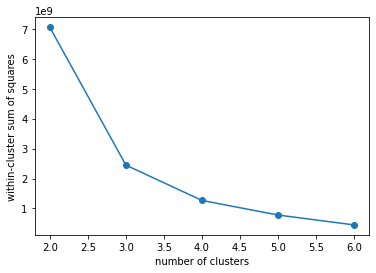

In [ ]:
fig, ax = plt.subplots()
ax.plot(range(2,maxk), wcss[2:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")

In [ ]:
km = KMeans(k)
y_pred = km.fit_predict(data)

In [ ]:
i = 120
print(y_pred[i], labels[i])

0 0


5